In [28]:
import pandas as pd
import numpy as np

In [29]:
#import dataframe
df_cleaned_edcovid=pd.read_csv ('../Outputs/cleaned_educational_covid_merged.csv')

df_cleaned_edcovid

,County,State,Alpha code,Population 18-24,Bachelors 18-24,Population Over 25,Bachelors Over 25,population,total cases,total deaths,...,hospital icu beds usage,hospital icu beds covid,vaccination initiated,vaccination completed,vaccination initiated ratio,vaccination completed ratio,vaccination addl dose,vaccination addl dose ratio,vaccination booster,vaccination booster ratio
0,Baldwin County,Alabama,AL,16407,1620,178759,59850,223234,70476,446,...,26.0,0.0,149596.0,119284.0,0.670,0.534,47583.0,0.213,19133.0,0.086
1,Calhoun County,Alabama,AL,12900,985,78478,16568,113605,41912,358,...,18.0,1.0,67165.0,55615.0,0.591,0.490,22007.0,0.194,7679.0,0.068
2,Cullman County,Alabama,AL,7022,112,63473,12787,83768,31702,150,...,7.0,1.0,38911.0,32943.0,0.465,0.393,13129.0,0.157,4396.0,0.052
3,DeKalb County,Alabama,AL,6580,429,48375,6597,71513,22651,104,...,3.0,1.0,30901.0,25210.0,0.432,0.353,9896.0,0.138,3166.0,0.044
4,Elmore County,Alabama,AL,6731,123,63862,14345,81209,30060,98,...,2.0,NaN,48321.0,39299.0,0.595,0.484,14703.0,0.181,5098.0,0.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,Waukesha County,Wisconsin,WI,30602,5903,294850,143598,404198,141207,762,...,40.0,1.0,319939.0,294057.0,0.792,0.728,179816.0,0.445,91072.0,0.225
824,Winnebago County,Wisconsin,WI,19998,2150,116840,33586,171907,64589,137,...,13.0,0.0,118806.0,109922.0,0.691,0.639,69937.0,0.407,36461.0,0.212
825,Wood County,Wisconsin,WI,5143,480,52971,12796,72999,27518,47,...,25.0,0.0,51308.0,46843.0,0.703,0.642,28265.0,0.387,15692.0,0.215
826,Laramie County,Wyoming,WY,8508,759,69787,19803,99500,31964,44,...,6.0,0.0,67415.0,59013.0,0.678,0.593,26241.0,0.264,12525.0,0.126


In [30]:
#calculate totals
df_cleaned_edcovid['Total Adult Pop']=df_cleaned_edcovid['Population 18-24']+df_cleaned_edcovid['Population Over 25']
df_cleaned_edcovid['Total Adult Bach']=df_cleaned_edcovid['Bachelors 18-24']+df_cleaned_edcovid['Bachelors Over 25']
df_cleaned_edcovid.head()

,County,State,Alpha code,Population 18-24,Bachelors 18-24,Population Over 25,Bachelors Over 25,population,total cases,total deaths,...,vaccination initiated,vaccination completed,vaccination initiated ratio,vaccination completed ratio,vaccination addl dose,vaccination addl dose ratio,vaccination booster,vaccination booster ratio,Total Adult Pop,Total Adult Bach
0,Baldwin County,Alabama,AL,16407,1620,178759,59850,223234,70476,446,...,149596.0,119284.0,0.670,0.534,47583.0,0.213,19133.0,0.086,195166,61470
1,Calhoun County,Alabama,AL,12900,985,78478,16568,113605,41912,358,...,67165.0,55615.0,0.591,0.490,22007.0,0.194,7679.0,0.068,91378,17553
2,Cullman County,Alabama,AL,7022,112,63473,12787,83768,31702,150,...,38911.0,32943.0,0.465,0.393,13129.0,0.157,4396.0,0.052,70495,12899
3,DeKalb County,Alabama,AL,6580,429,48375,6597,71513,22651,104,...,30901.0,25210.0,0.432,0.353,9896.0,0.138,3166.0,0.044,54955,7026
4,Elmore County,Alabama,AL,6731,123,63862,14345,81209,30060,98,...,48321.0,39299.0,0.595,0.484,14703.0,0.181,5098.0,0.063,70593,14468


In [31]:
#calculate percentages

df_cleaned_edcovid['Percent of Adults (all) with Bachelors']=df_cleaned_edcovid['Total Adult Bach']/df_cleaned_edcovid['Total Adult Pop']*100
df_cleaned_edcovid['Percent of Adults (25+) with Bachelors']=df_cleaned_edcovid['Bachelors Over 25']/df_cleaned_edcovid['Population Over 25']*100
df_cleaned_edcovid['Mortality Percentage']=df_cleaned_edcovid['total deaths']/df_cleaned_edcovid['population']*100
df_cleaned_edcovid['Infection Percentage']=df_cleaned_edcovid['total cases']/df_cleaned_edcovid['population']*100
df_cleaned_edcovid['Start Vacc Percentage']=df_cleaned_edcovid['vaccination initiated ratio']*100
df_cleaned_edcovid['Vaccinated Percentage']=df_cleaned_edcovid['vaccination completed ratio']*100
df_cleaned_edcovid['Multiple Vacc Percentage']=df_cleaned_edcovid['vaccination addl dose ratio']*100
df_cleaned_edcovid.head()

,County,State,Alpha code,Population 18-24,Bachelors 18-24,Population Over 25,Bachelors Over 25,population,total cases,total deaths,...,vaccination booster ratio,Total Adult Pop,Total Adult Bach,Percent of Adults (all) with Bachelors,Percent of Adults (25+) with Bachelors,Mortality Percentage,Infection Percentage,Start Vacc Percentage,Vaccinated Percentage,Multiple Vacc Percentage
0,Baldwin County,Alabama,AL,16407,1620,178759,59850,223234,70476,446,...,0.086,195166,61470,31.496265,33.480832,0.199790,31.570460,67.0,53.4,21.3
1,Calhoun County,Alabama,AL,12900,985,78478,16568,113605,41912,358,...,0.068,91378,17553,19.209219,21.111649,0.315127,36.892742,59.1,49.0,19.4
2,Cullman County,Alabama,AL,7022,112,63473,12787,83768,31702,150,...,0.052,70495,12899,18.297752,20.145574,0.179066,37.845000,46.5,39.3,15.7
3,DeKalb County,Alabama,AL,6580,429,48375,6597,71513,22651,104,...,0.044,54955,7026,12.785006,13.637209,0.145428,31.673961,43.2,35.3,13.8
4,Elmore County,Alabama,AL,6731,123,63862,14345,81209,30060,98,...,0.063,70593,14468,20.494950,22.462497,0.120676,37.015602,59.5,48.4,18.1


In [32]:
#reduce to relevant columns
education_df = df_cleaned_edcovid[['County','State', 'Population Over 25', 'Bachelors Over 25','Total Adult Pop', 'Total Adult Bach',
       'Percent of Adults (all) with Bachelors',
       'Percent of Adults (25+) with Bachelors', 'Mortality Percentage',
       'Infection Percentage', 'Start Vacc Percentage',
       'Vaccinated Percentage', 'Multiple Vacc Percentage']]
education_df

,County,State,Population Over 25,Bachelors Over 25,Total Adult Pop,Total Adult Bach,Percent of Adults (all) with Bachelors,Percent of Adults (25+) with Bachelors,Mortality Percentage,Infection Percentage,Start Vacc Percentage,Vaccinated Percentage,Multiple Vacc Percentage
0,Baldwin County,Alabama,178759,59850,195166,61470,31.496265,33.480832,0.199790,31.570460,67.0,53.4,21.3
1,Calhoun County,Alabama,78478,16568,91378,17553,19.209219,21.111649,0.315127,36.892742,59.1,49.0,19.4
2,Cullman County,Alabama,63473,12787,70495,12899,18.297752,20.145574,0.179066,37.845000,46.5,39.3,15.7
3,DeKalb County,Alabama,48375,6597,54955,7026,12.785006,13.637209,0.145428,31.673961,43.2,35.3,13.8
4,Elmore County,Alabama,63862,14345,70593,14468,20.494950,22.462497,0.120676,37.015602,59.5,48.4,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,Waukesha County,Wisconsin,294850,143598,325452,149501,45.936421,48.702052,0.188521,34.935106,79.2,72.8,44.5
824,Winnebago County,Wisconsin,116840,33586,136838,35736,26.115553,28.745293,0.079694,37.572059,69.1,63.9,40.7
825,Wood County,Wisconsin,52971,12796,58114,13276,22.844753,24.156614,0.064384,37.696407,70.3,64.2,38.7
826,Laramie County,Wyoming,69787,19803,78295,20562,26.262213,28.376345,0.044221,32.124623,67.8,59.3,26.4


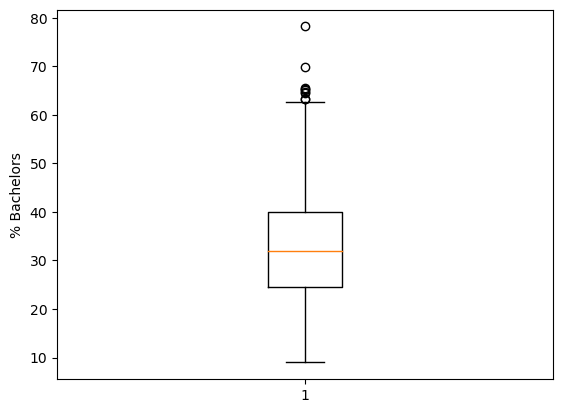

In [33]:
#check predictor variable for outliers
fig1, ax1 = plt.subplots()
ax1.set_ylabel('% Bachelors')
ax1.boxplot(education_df['Percent of Adults (25+) with Bachelors'])
plt.show()

In [34]:
#find outlier
education_df = education_df.sort_values(['Percent of Adults (25+) with Bachelors'], ascending=False)
education_df.head()           

,County,State,Population Over 25,Bachelors Over 25,Total Adult Pop,Total Adult Bach,Percent of Adults (all) with Bachelors,Percent of Adults (25+) with Bachelors,Mortality Percentage,Infection Percentage,Start Vacc Percentage,Vaccinated Percentage,Multiple Vacc Percentage
745,Arlington County,Virginia,172399,134843,191832,147122,76.693148,78.215651,0.054044,28.361101,95.0,91.7,NaN
763,Alexandria city,Virginia,118226,82656,127631,85650,67.107521,69.913555,0.015054,28.764709,90.8,80.0,NaN
749,Fairfax County,Virginia,783879,513132,880592,534268,60.671457,65.460613,0.112415,22.957181,92.5,83.8,NaN
101,District of Columbia,District of Columbia,479231,313274,547559,334967,61.174595,65.370145,0.203330,25.349522,NaN,NaN,NaN
305,Howard County,Maryland,228681,149040,256609,156788,61.099961,65.173757,0.027020,19.929381,95.0,90.8,59.6


In [35]:
#remove outlier
education_df = education_df.loc[education_df['Percent of Adults (25+) with Bachelors']<70]
education_df

,County,State,Population Over 25,Bachelors Over 25,Total Adult Pop,Total Adult Bach,Percent of Adults (all) with Bachelors,Percent of Adults (25+) with Bachelors,Mortality Percentage,Infection Percentage,Start Vacc Percentage,Vaccinated Percentage,Multiple Vacc Percentage
763,Alexandria city,Virginia,118226,82656,127631,85650,67.107521,69.913555,0.015054,28.764709,90.8,80.0,NaN
749,Fairfax County,Virginia,783879,513132,880592,534268,60.671457,65.460613,0.112415,22.957181,92.5,83.8,NaN
101,District of Columbia,District of Columbia,479231,313274,547559,334967,61.174595,65.370145,0.203330,25.349522,NaN,NaN,NaN
305,Howard County,Maryland,228681,149040,256609,156788,61.099961,65.173757,0.027020,19.929381,95.0,90.8,59.6
755,Loudoun County,Virginia,282964,182901,318192,190252,59.791572,64.637551,0.042801,23.855607,87.0,80.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,McKinley County,New Mexico,44054,6084,50796,6109,12.026538,13.810324,0.444183,47.963344,95.0,75.2,NaN
3,DeKalb County,Alabama,48375,6597,54955,7026,12.785006,13.637209,0.145428,31.673961,43.2,35.3,13.8
278,Iberia Parish,Louisiana,45156,5807,51195,6224,12.157437,12.859864,0.015753,35.142489,55.0,48.4,20.6
438,Lea County,New Mexico,43115,5197,51524,5443,10.564009,12.053810,0.136485,32.549599,48.4,41.9,NaN


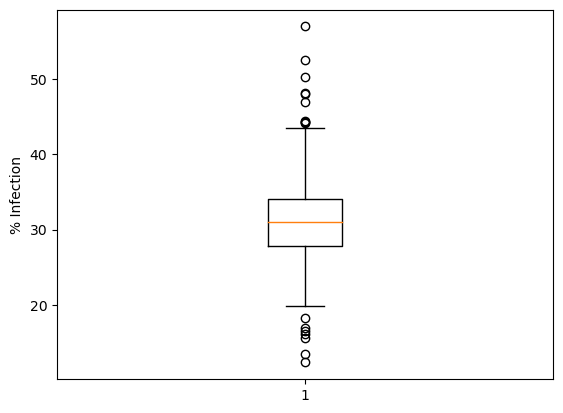

In [36]:
#check infection rate for outliers

fig1, ax1 = plt.subplots()
ax1.set_ylabel('% Infection')
ax1.boxplot(education_df['Infection Percentage'])
plt.show()

r value: -0.25
p value: 0.0
regression equation: y=-0.12*x+34.97


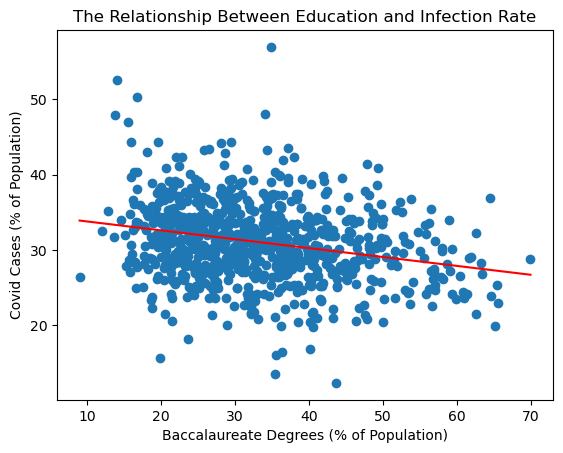

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#first regression: Education -->Infection Rate
slope, intc, r, p, std_err = linregress(education_df['Percent of Adults (25+) with Bachelors'], education_df['Infection Percentage'])
model=slope*education_df["Percent of Adults (25+) with Bachelors"]+intc
plt.scatter(education_df["Percent of Adults (25+) with Bachelors"], education_df["Infection Percentage"])
plt.plot(education_df["Percent of Adults (25+) with Bachelors"], model, color='red')
plt.title('The Relationship Between Education and Infection Rate')
plt.ylabel('Covid Cases (% of Population)')
plt.xlabel('Baccalaureate Degrees (% of Population)')
plt.savefig("../Outputs/EdInfect.png")
print(str("r value: ") + str(r.round(2)))
print(str("p value: ")+ str(p.round(2)))
print("regression equation: y="+str(slope.round(2))+"*x+"+str(intc.round(2)))

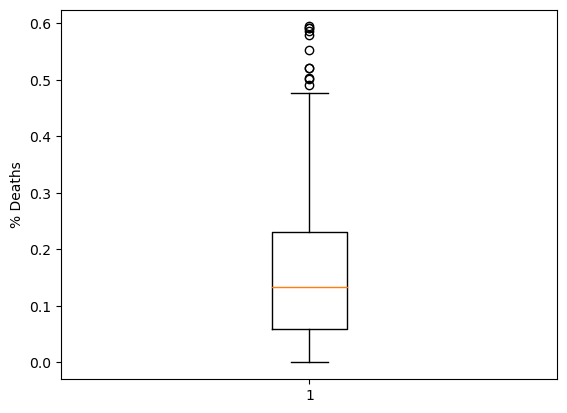

In [38]:
#check mortality for outliers
fig1, ax1 = plt.subplots()
ax1.set_ylabel('% Deaths')
ax1.boxplot(education_df['Mortality Percentage'])
plt.show()

r value: -0.17
p value: 0.0
regression equation: y=-0.0*x+0.22


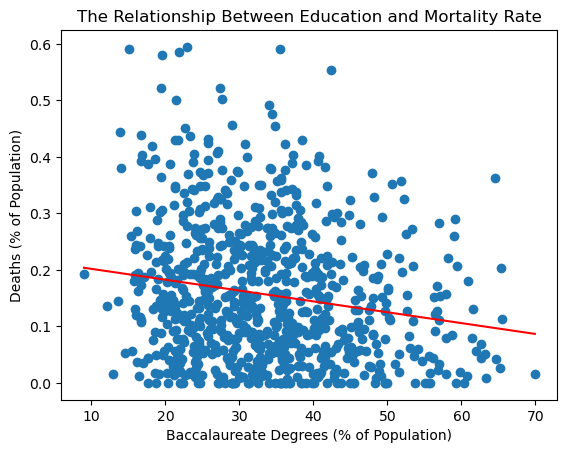

In [39]:
#second regression: Education -->Mortality Rate
slope, intc, r, p, std_err = linregress(education_df['Percent of Adults (25+) with Bachelors'], education_df['Mortality Percentage'])
model=slope*education_df["Percent of Adults (25+) with Bachelors"]+intc
plt.scatter(education_df["Percent of Adults (25+) with Bachelors"], education_df["Mortality Percentage"])
plt.plot(education_df["Percent of Adults (25+) with Bachelors"], model, color='red')
plt.title('The Relationship Between Education and Mortality Rate')
plt.ylabel('Deaths (% of Population)')
plt.xlabel('Baccalaureate Degrees (% of Population)')
plt.savefig("../Outputs/EdMort.png")
print(str("r value: ") + str(r.round(2)))
print(str("p value: ")+ str(p.round(2)))
print("regression equation: y="+str(slope.round(2))+"*x+"+str(intc.round(2)))

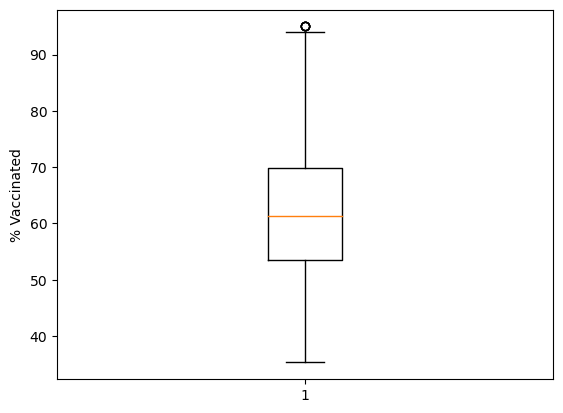

In [40]:
#drop missing vaccination values
education_v=education_df
education_v.dropna(subset=['Vaccinated Percentage'], inplace=True)

#check for vaccination outliers
#check mortality for outliers
fig1, ax1 = plt.subplots()
ax1.set_ylabel('% Vaccinated')
ax1.boxplot(education_df['Vaccinated Percentage'])
plt.show()

In [41]:
#find outlier
education_v = education_v.sort_values(['Vaccinated Percentage'], ascending=False)
education_v.head()    

,County,State,Population Over 25,Bachelors Over 25,Total Adult Pop,Total Adult Bach,Percent of Adults (all) with Bachelors,Percent of Adults (25+) with Bachelors,Mortality Percentage,Infection Percentage,Start Vacc Percentage,Vaccinated Percentage,Multiple Vacc Percentage
732,Webb County,Texas,153782,34427,185188,36690,19.812299,22.386885,0.287003,38.893990,95.0,95.0,33.6
23,Apache County,Arizona,41879,5864,48471,5926,12.225867,14.002245,0.379763,52.503234,95.0,95.0,61.8
725,Starr County,Texas,36978,5906,44564,6486,14.554349,15.971659,0.304798,39.651571,95.0,95.0,30.8
768,Norfolk city,Virginia,150042,48221,186204,52515,28.202939,32.138335,0.082804,22.399502,95.0,95.0,NaN
50,Imperial County,California,111134,18617,128574,19652,15.284583,16.751849,0.392903,50.287228,95.0,95.0,46.4


r value: 0.62
p value: 0.0
regression equation: y=0.67*x+39.9


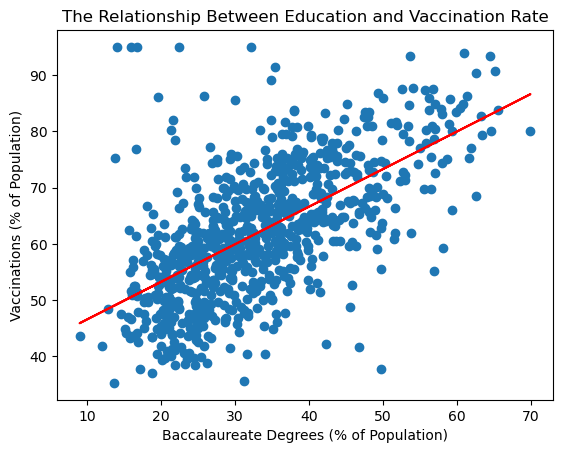

In [42]:
#third regression: Education -->Vaccination Rate
slope, intc, r, p, std_err = linregress(education_v['Percent of Adults (25+) with Bachelors'], education_v['Vaccinated Percentage'])
model=slope*education_v["Percent of Adults (25+) with Bachelors"]+intc
plt.scatter(education_v["Percent of Adults (25+) with Bachelors"], education_v["Vaccinated Percentage"])
plt.plot(education_v["Percent of Adults (25+) with Bachelors"], model, color='red')
plt.title('The Relationship Between Education and Vaccination Rate')
plt.ylabel('Vaccinations (% of Population)')
plt.xlabel('Baccalaureate Degrees (% of Population)')
plt.savefig("../Outputs/EdVacc.png")
print(str("r value: ") + str(r.round(2)))
print(str("p value: ")+ str(p.round(2)))
print("regression equation: y="+str(slope.round(2))+"*x+"+str(intc.round(2)))

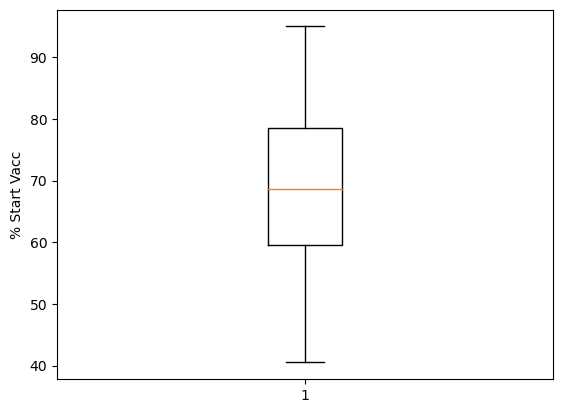

In [43]:
#drop missing start vacc values
education_s=education_df
education_s.dropna(subset=['Start Vacc Percentage'], inplace=True)

#check for start vacc outliers
fig1, ax1 = plt.subplots()
ax1.set_ylabel('% Start Vacc')
ax1.boxplot(education_df['Start Vacc Percentage'])
plt.show()

r value: 0.61
p value: 0.0
regression equation: y=0.74*x+45.21


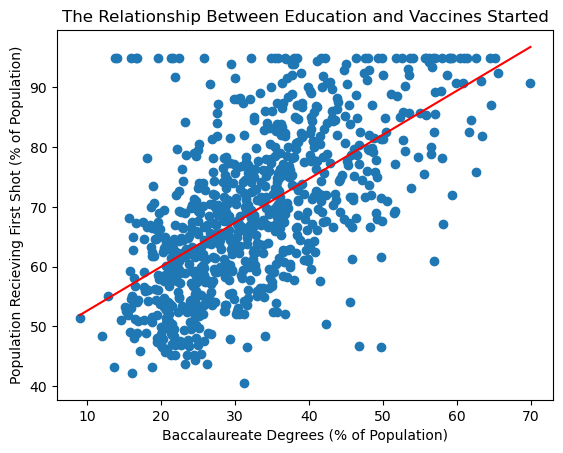

In [44]:
#fourth regression: Education -->Start Vaccine Rate


slope, intc, r, p, std_err = linregress(education_s['Percent of Adults (25+) with Bachelors'], education_s['Start Vacc Percentage'])
model=slope*education_s["Percent of Adults (25+) with Bachelors"]+intc
plt.scatter(education_s["Percent of Adults (25+) with Bachelors"], education_s["Start Vacc Percentage"])
plt.plot(education_s["Percent of Adults (25+) with Bachelors"], model, color='red')
plt.title('The Relationship Between Education and Vaccines Started')
plt.ylabel('Population Recieving First Shot (% of Population)')
plt.xlabel('Baccalaureate Degrees (% of Population)')
plt.savefig("../Outputs/EdStart.png")
print(str("r value: ") + str(r.round(2)))
print(str("p value: ")+ str(p.round(2)))
print("regression equation: y="+str(slope.round(2))+"*x+"+str(intc.round(2)))

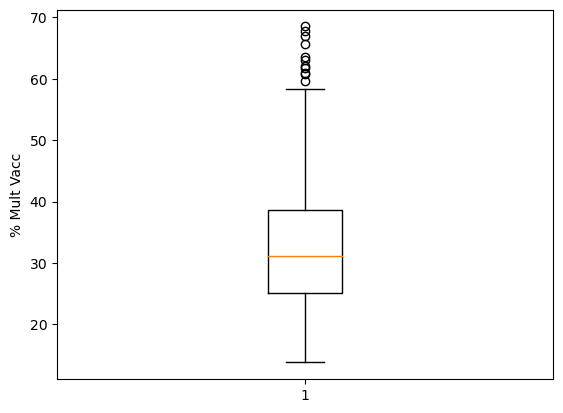

In [45]:
#drop missing multiple vacc values
education_m=education_df
education_m.dropna(subset=['Multiple Vacc Percentage'], inplace=True)

#check for multiple vacc outliers
fig1, ax1 = plt.subplots()
ax1.set_ylabel('% Mult Vacc')
ax1.boxplot(education_df['Multiple Vacc Percentage'])
plt.show()

r value: 0.64
p value: 0.0
regression equation: y=0.59*x+12.9


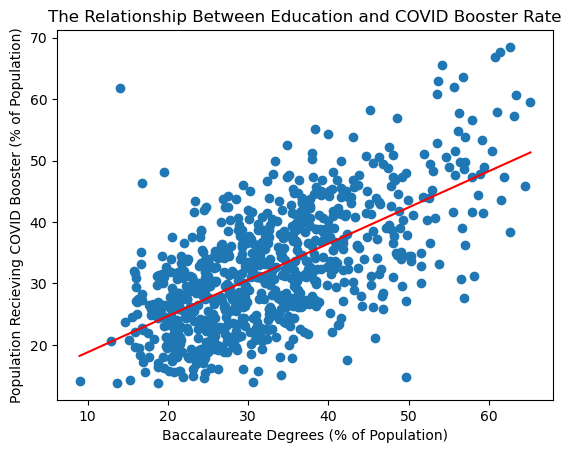

In [46]:
#fifth regression: Education -->Multiple Vaccine Rate


slope, intc, r, p, std_err = linregress(education_m['Percent of Adults (25+) with Bachelors'], education_m['Multiple Vacc Percentage'])
model=slope*education_m["Percent of Adults (25+) with Bachelors"]+intc
plt.scatter(education_m["Percent of Adults (25+) with Bachelors"], education_m["Multiple Vacc Percentage"])
plt.plot(education_m["Percent of Adults (25+) with Bachelors"], model, color='red')
plt.title('The Relationship Between Education and COVID Booster Rate')
plt.ylabel('Population Recieving COVID Booster (% of Population)')
plt.xlabel('Baccalaureate Degrees (% of Population)')
plt.savefig("../Outputs/EdMult.png")
print(str("r value: ") + str(r.round(2)))
print(str("p value: ")+ str(p.round(2)))
print("regression equation: y="+str(slope.round(2))+"*x+"+str(intc.round(2)))